# Database interaction

In [257]:
import numpy as np
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
import seaborn as sns
#import os
#import sys

from utils.db_utils import get_db_absolute_path
from database.queries import QUERY_CREATE_VIEW_RANK_TEST__GROUPED, QUERY_CREATE_VIEW_TRACE_METADATA_DEPTH__GROUPED, \
QUERY_QUALITY_TABLE
from plots.rank_test_plots import plot_best_additive_noise_methods_2
from utils.plot_utils import df_to_latex__additive
from utils.statistic_utils import root_mean_square, signal_to_noise_ratio__sqrt_mean_std

In [258]:
# Setup sqlite connection
database = get_db_absolute_path("main.db")
con = lite.connect(database)

In [3]:
# Create view
#con.execute("drop view quality_table;")
#con.execute("drop view rank_test__grouped;")
#con.execute("drop view trace_metadata_depth__grouped;")
#con.execute(QUERY_CREATE_VIEW_RANK_TEST__GROUPED)
#con.execute(QUERY_CREATE_VIEW_TRACE_METADATA_DEPTH__GROUPED)
#con.execute(QUERY_QUALITY_TABLE)

In [4]:
query = """
select 
    * 
from 
    quality_table 
where 
    trace_process_id = 2
    and test_dataset_id = 1
    and environment_id = 1
    and epoch = 65
    and distance = 15
    and denoising_method_id IS NULL
    and
    (additive_noise_method_id IS NULL OR
    additive_noise_method_id = 4 OR
    additive_noise_method_id = 6)
ORDER BY
    additive_noise_method_id
;"""
data = pd.read_sql_query(query, con)
data.fillna("None",inplace=True)
data["dyn_range"] = data["max_max"] - data["min_min"]
data

,test_dataset_id,environment_id,distance,device,epoch,additive_noise_method_id,denoising_method_id,count_term_p,avg_term_p,trace_process_id,max_max,min_min,avg_mean,avg_rms,dyn_range
0,1,1,15.0,10,65,None,None,316,324.518987,2,0.035055,0.000216,0.007659,0.007735,0.034839
1,1,1,15.0,8,65,None,None,315,604.203175,2,0.025780,0.000437,0.007029,0.007101,0.025343
2,1,1,15.0,7,65,None,None,210,650.509524,2,0.025296,0.000000,0.007060,0.007134,0.025296
3,1,1,15.0,6,65,None,None,183,755.169399,2,0.014852,0.000398,0.006266,0.006334,0.014454
4,1,1,15.0,9,65,None,None,311,779.919614,2,0.030896,0.000000,0.007029,0.007102,0.030896
5,1,1,15.0,10,65,4.0,None,285,149.884211,2,0.035055,0.000216,0.007659,0.007735,0.034839
6,1,1,15.0,8,65,4.0,None,205,322.248780,2,0.025780,0.000437,0.007029,0.007101,0.025343
7,1,1,15.0,7,65,4.0,None,100,329.940000,2,0.025296,0.000000,0.007060,0.007134,0.025296
8,1,1,15.0,6,65,4.0,None,129,352.503876,2,0.014852,0.000398,0.006266,0.006334,0.014454
9,1,1,15.0,9,65,4.0,None,286,527.451049,2,0.030896,0.000000,0.007029,0.007102,0.030896


/usr/local/Caskroom/miniconda/base/envs/MEX/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_rms', ylabel='avg_term_p'>

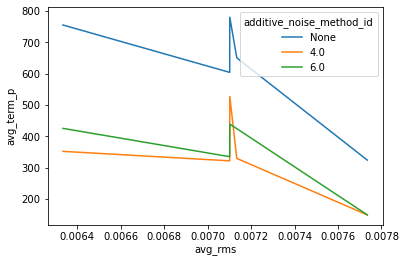

In [5]:
#data.plot(x="avg_mean", y="avg_term_p", kind="scatter")
sns.lineplot(data["avg_rms"], data["avg_term_p"], hue=data["additive_noise_method_id"])

/usr/local/Caskroom/miniconda/base/envs/MEX/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-0.7793965542684816
-0.8058476993372404


,,training_dataset_id,trace_process_id,test_dataset_id,distance,environment_id,rank_trace_process_id,device,avg_term_p,rms_val,snr_val,std_val,dyn_range
,,,,,,,,,,mean,SNR_mean,SNR_mean,mean
training_dataset_id,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trace_process_id,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_dataset_id,,NaN,NaN,1.000000,-0.612971,NaN,NaN,NaN,0.347657,-0.682547,-0.383650,-0.753071,-0.884936
distance,,NaN,NaN,-0.612971,1.000000,NaN,NaN,NaN,0.303975,-0.126308,-0.470537,-0.045432,0.549927
environment_id,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_trace_process_id,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_term_p,,NaN,NaN,0.347657,0.303975,NaN,NaN,NaN,1.000000,-0.779397,-0.805848,-0.736174,-0.475963
rms_val,mean,NaN,NaN,-0.682547,-0.126308,NaN,NaN,NaN,-0.779397,1.000000,0.934534,0.991621,0.710453


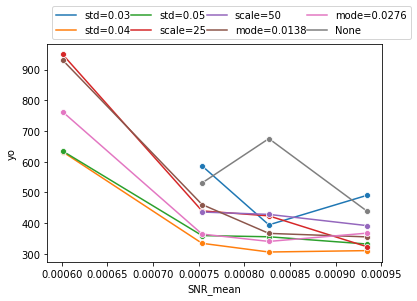

In [256]:
def SNR_mean(x):
    return root_mean_square(x)

def SNR_mean_2(x):
    return x.mean()


database = get_db_absolute_path("main.db")
con = lite.connect(database)
query = f"""
    SELECT 
        * 
    FROM 
        quality_table_2 
    WHERE 
        trace_process_id = 2
        AND training_dataset_id = 3
        AND device = 8
        AND environment_id = 1
        AND rank_trace_process_id = 9
        AND denoising_method_id IS NULL
        AND count_term_p > 99
        AND data_point_index BETWEEN 204 AND 314
    ORDER BY
        additive_noise_method_id
    ;
"""

data = pd.read_sql_query(query, con)
data.fillna("None", inplace=True)
#data["snr_koko"] = data["mean_val"] / data["std_val"]
data["dyn_range"] = data["max_val"] - data["min_val"]
#print(data)

data = data.groupby(
    [
        "training_dataset_id",
        "trace_process_id", 
        "test_dataset_id", 
        "distance",
        "environment_id", 
        "rank_trace_process_id",
        "device",
        "rank_additive_noise_method_id",
        "avg_term_p",
    ]).agg(
    {
        "rms_val": ["mean"],
        "snr_val": [SNR_mean],
        "std_val": [SNR_mean],
        "dyn_range": ["mean"],
        #"snr_koko": [SNR_mean_2],
        #"avg_term_p": ["mean"],
    }
)

data = data.reset_index()
data["rank_additive_noise_method_id"] = data["rank_additive_noise_method_id"].replace(
    [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0],
    ["std=0.03","std=0.04", "std=0.05", "scale=25", "scale=50", "scale=75", "mode=0.0138", "mode=0.0276"]
)
#data["snr_val"]["SNR_mean_2"]
s = sns.lineplot(
    #data["snr_val"]["SNR_mean"],
   #data["snr_koko"]["SNR_mean_2"],
    #data["rms_val"]["mean"],
    data["std_val"]["SNR_mean"],
    data["avg_term_p"], #["mean"],
    hue=data["device"],
    # ax=ax1,
    marker='o'
)
s.set_ylabel("yo")
s.legend(
    bbox_to_anchor=(0., 1, 1.1, 0),
    loc="lower left",
    mode="expand",
    ncol=4
)

corr = data.corr()
print(corr["avg_term_p"]["rms_val"][0])
print(corr["avg_term_p"]["snr_val"][0])
corr["rms_val"]["mean"]["snr_val"][0]
corr

In [3]:
def interval_upper(x):
    a = 1.96
    mean = x.mean()
    sem = x.sem()
    return mean + a*sem


def interval_lower(x):
    a = 1.96
    mean = x.mean()
    sem = x.sem()
    return mean - a*sem



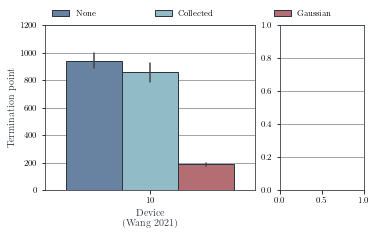

NameError: name 'interval_lower' is not defined

In [261]:
trace_process_id = 3
wang, zedigh = plot_best_additive_noise_methods_2(
    trace_process_id=trace_process_id,
    save_path=None,
    file_format="pgf",
    show=True,
)

wang = wang.rename(
    columns={
        "termination_point": "Termination point",
        "additive_noise_method": "Noise method",
        "device": "Device",
    }
)


g = wang.groupby(["Noise method", "Device"])
#wang = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
wang = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)
wang = wang.groupby(["Noise method"]).agg(
    {'Termination point': ['mean', 'std', 'count', interval_lower, interval_upper]})
wang = wang.rename(
    columns={
        "mean": "Mean",
        "std": "$\sigma$",
        "count": "Count",
        "interval_lower": "$CI_{-}$",
        "interval_upper": "$CI_{+}$",
    }
)

# latex = wang.to_latex(
    # header=["M", "D", "M"],
#    sparsify=True,
#    float_format="%.0f",
#    label="_wang",
#    escape=False,
#    caption=f"Table for Wang 2021 dataset (trace process)",
#)

wang

In [17]:
trace_process_id = 10
training_dataset = 'Wang_2021 - Cable, 5 devices, 500k traces'
distance = 15
environment = 'office_corridor'
test_dataset = 'Wang_2021'
training_model = "cnn_110"

epoch_1 = 12
epoch_2 = 12
epoch_3 = 12
epoch_4 = 19
epoch_none = 12

additive_noise_method = "Gaussian"
parameter_1_value_1 = 0.01
parameter_1_value_2 = 0.03
parameter_1_value_3 = 0.04
parameter_1_value_4 = 0.05

query_wang = f"""
    select
        environment,
        device,
        epoch,
        additive_noise_method,
        additive_noise_method_parameter_1,
        additive_noise_method_parameter_1_value,
        additive_noise_method_parameter_2,
        additive_noise_method_parameter_2_value,
        termination_point
    from
        full_rank_test
    where
        trace_process_id = {trace_process_id}
        AND training_model = '{training_model}'
        AND training_dataset = '{training_dataset}'
        AND test_dataset = 'Wang_2021'
        AND environment = '{environment}'
        AND distance = {distance}
        AND denoising_method IS NULL
        AND (additive_noise_method IS NULL OR additive_noise_method = '{additive_noise_method}')
        AND (
            (additive_noise_method_parameter_1_value = {parameter_1_value_1} AND epoch = {epoch_none})
            OR (additive_noise_method_parameter_1_value = {parameter_1_value_2} AND epoch = {epoch_1})
            OR (additive_noise_method_parameter_1_value = {parameter_1_value_2} AND epoch = {epoch_2})
            OR (additive_noise_method_parameter_1_value = {parameter_1_value_3} AND epoch = {epoch_3})
            OR (additive_noise_method_parameter_1_value = {parameter_1_value_4} AND epoch = {epoch_4})
        )
    order by
        additive_noise_method_parameter_1_value
        ;
"""

data = pd.read_sql_query(query, con)
data

,environment,device,epoch,additive_noise_method,additive_noise_method_parameter_1,additive_noise_method_parameter_1_value,additive_noise_method_parameter_2,additive_noise_method_parameter_2_value,termination_point
0,office_corridor,10,12,Gaussian,Std,0.03,Mean,0.0,184
1,office_corridor,10,12,Gaussian,Std,0.03,Mean,0.0,174
2,office_corridor,10,12,Gaussian,Std,0.04,Mean,0.0,246
3,office_corridor,10,12,Gaussian,Std,0.04,Mean,0.0,294
4,office_corridor,10,19,Gaussian,Std,0.05,Mean,0.0,146
...,...,...,...,...,...,...,...,...,...
501,office_corridor,10,19,Gaussian,Std,0.05,Mean,0.0,178
502,office_corridor,10,19,Gaussian,Std,0.05,Mean,0.0,188
503,office_corridor,10,19,Gaussian,Std,0.05,Mean,0.0,165
504,office_corridor,10,19,Gaussian,Std,0.05,Mean,0.0,197


In [15]:
# Find which are fully analysed
"select *, count(*) from rank_test where trace_process_id = 10 group by additive_noise_method_id, epoch;"

'select *, count(*) from rank_test where trace_process_id = 10 group by additive_noise_method_id, epoch;'